# **Mithila ART CLASSIFICATION MODEL**

## Install Necessary Dependencies

In [1]:
!pip install tensorflow keras numpy matplotlib scikit-learn opencv-python

!pip install pillow

In [2]:
import os

import shutil

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image

import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.applications import VGG16

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import TensorBoard

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Conv2D, Dropout, Dense, GlobalMaxPooling2D

import datetime






In [3]:
def split_data(source_dir, dest_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):

    # Validate ratios

    if train_ratio + val_ratio + test_ratio != 1.0:

        raise ValueError("Train, validation, and test ratios must sum to 1.")

    

    # Create destination folders

    for split in ['train', 'val', 'test']:

        split_path = os.path.join(dest_dir, split)

        os.makedirs(split_path, exist_ok=True)

    

    # Iterate over each class folder

    for class_name in os.listdir(source_dir):

        class_path = os.path.join(source_dir, class_name)

        if not os.path.isdir(class_path):

            continue

        

        # Get all files in the class folder

        files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        

        # Split files into train, validation, and test sets

        train_files, temp_files = train_test_split(files, test_size=(1 - train_ratio), random_state=42)

        val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

        

        # Copy files to destination directories

        for split, split_files in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):

            split_class_dir = os.path.join(dest_dir, split, class_name)

            os.makedirs(split_class_dir, exist_ok=True)

            for file in split_files:

                shutil.copy(os.path.join(class_path, file), os.path.join(split_class_dir, file))

    

    print("Data successfully split into train, validation, and test sets.")



# Example usage:

source_directory = "C:\\Users\PC\\Downloads\\folk-art-dataset-main"

destination_directory = "./dataset"



# split_data(source_directory, destination_directory)


In [4]:
def convert_images_to_jpg(dataset_dir):

    # Supported extensions for conversion

    supported_extensions = ['.jpeg', '.png', '.gif']

    

    # Traverse through the dataset directory

    for root, _, files in os.walk(dataset_dir):

        for file in files:

            file_path = os.path.join(root, file)

            file_name, file_ext = os.path.splitext(file)



            # Check if file has a supported extension

            if file_ext.lower() in supported_extensions:

                try:

                    # Open the image

                    img = Image.open(file_path).convert('RGB')

                    

                    # New file path with the same directory but `.jpg` extension

                    new_file_path = os.path.join(root, f"{file_name}.jpg")

                    

                    # Save the image as `.jpg`

                    img.save(new_file_path, 'JPEG')

                    

                    # Delete the original file

                    os.remove(file_path)

                    

                    print(f"Converted and replaced: {file_path} -> {new_file_path}")

                except Exception as e:

                    print(f"Error converting {file_path}: {e}")



# Example usage

dataset_directory = "./dataset"

# convert_images_to_jpg(dataset_directory)


In [5]:
img_size = (128, 128)

batch_size = 8

In [6]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(

    '/kaggle/input/mithila-art-classification-dataset/dataset/train',

    target_size=img_size,

    batch_size=batch_size,

    class_mode='categorical'

)

Found 21151 images belonging to 30 classes.


In [7]:
print("Class Indices:", train_generator.class_indices)

Class Indices: {'Aipan Art (Uttarakhand)': 0, 'Assamese Miniature Painting (Assam)': 1, 'Basholi Painting (Jammu and Kashmir)': 2, 'Bhil Painting (Madhya Pradesh)': 3, 'Chamba Rumal (Himachal Pradesh)': 4, 'Cheriyal Scroll Painting (Telangana)': 5, 'Dokra Art(West Bengal)': 6, 'Gond Painting (Madhya Pradesh)': 7, 'Kalamkari Painting (Andra Pradesh and Telangana)': 8, 'Kalighat Painting (West Bengal)': 9, 'Kangra Painting (Himachal Pradesh)': 10, 'Kerala Mural Painting (Kerala)': 11, 'Kondapalli Bommallu (Andra Pradesh)': 12, 'Kutch Lippan Art (Gujarat)': 13, 'Leather Puppet Art (Andra Pradesh)': 14, 'Madhubani Painting (Bihar)': 15, 'Mandala Art': 16, 'Mandana Art (Rajasthan)': 17, 'Mata Ni Pachedi (Gujarat)': 18, 'Meenakari Painting (Rajasthan)': 19, 'Mughal Paintings': 20, 'Mysore Ganjifa Art (Karnataka)': 21, 'Pattachitra Painting (Odisha and Bengal)': 22, 'Patua Painting (West Bengal)': 23, 'Pichwai Painting (Rajasthan)': 24, 'Rajasthani Miniature Painting (Rajasthan)': 25, 'Rogan 

In [8]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_datagen.flow_from_directory(

    '/kaggle/input/mithila-art-classification-dataset/dataset/test',

    target_size=img_size,

    batch_size=batch_size,

    class_mode='categorical'

)

Found 4522 images belonging to 30 classes.


In [9]:
print("Class Indices:", test_generator.class_indices)

Class Indices: {'Aipan Art (Uttarakhand)': 0, 'Assamese Miniature Painting (Assam)': 1, 'Basholi Painting (Jammu and Kashmir)': 2, 'Bhil Painting (Madhya Pradesh)': 3, 'Chamba Rumal (Himachal Pradesh)': 4, 'Cheriyal Scroll Painting (Telangana)': 5, 'Dokra Art(West Bengal)': 6, 'Gond Painting (Madhya Pradesh)': 7, 'Kalamkari Painting (Andra Pradesh and Telangana)': 8, 'Kalighat Painting (West Bengal)': 9, 'Kangra Painting (Himachal Pradesh)': 10, 'Kerala Mural Painting (Kerala)': 11, 'Kondapalli Bommallu (Andra Pradesh)': 12, 'Kutch Lippan Art (Gujarat)': 13, 'Leather Puppet Art (Andra Pradesh)': 14, 'Madhubani Painting (Bihar)': 15, 'Mandala Art': 16, 'Mandana Art (Rajasthan)': 17, 'Mata Ni Pachedi (Gujarat)': 18, 'Meenakari Painting (Rajasthan)': 19, 'Mughal Paintings': 20, 'Mysore Ganjifa Art (Karnataka)': 21, 'Pattachitra Painting (Odisha and Bengal)': 22, 'Patua Painting (West Bengal)': 23, 'Pichwai Painting (Rajasthan)': 24, 'Rajasthani Miniature Painting (Rajasthan)': 25, 'Rogan 

In [10]:
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

val_generator = val_datagen.flow_from_directory(

    '/kaggle/input/mithila-art-classification-dataset/dataset/val',

    target_size=img_size,

    batch_size=batch_size,

    class_mode='categorical'

)

Found 4543 images belonging to 30 classes.


In [11]:
print("Class Indices:", val_generator.class_indices)

Class Indices: {'Aipan Art (Uttarakhand)': 0, 'Assamese Miniature Painting (Assam)': 1, 'Basholi Painting (Jammu and Kashmir)': 2, 'Bhil Painting (Madhya Pradesh)': 3, 'Chamba Rumal (Himachal Pradesh)': 4, 'Cheriyal Scroll Painting (Telangana)': 5, 'Dokra Art(West Bengal)': 6, 'Gond Painting (Madhya Pradesh)': 7, 'Kalamkari Painting (Andra Pradesh and Telangana)': 8, 'Kalighat Painting (West Bengal)': 9, 'Kangra Painting (Himachal Pradesh)': 10, 'Kerala Mural Painting (Kerala)': 11, 'Kondapalli Bommallu (Andra Pradesh)': 12, 'Kutch Lippan Art (Gujarat)': 13, 'Leather Puppet Art (Andra Pradesh)': 14, 'Madhubani Painting (Bihar)': 15, 'Mandala Art': 16, 'Mandana Art (Rajasthan)': 17, 'Mata Ni Pachedi (Gujarat)': 18, 'Meenakari Painting (Rajasthan)': 19, 'Mughal Paintings': 20, 'Mysore Ganjifa Art (Karnataka)': 21, 'Pattachitra Painting (Odisha and Bengal)': 22, 'Patua Painting (West Bengal)': 23, 'Pichwai Painting (Rajasthan)': 24, 'Rajasthani Miniature Painting (Rajasthan)': 25, 'Rogan 

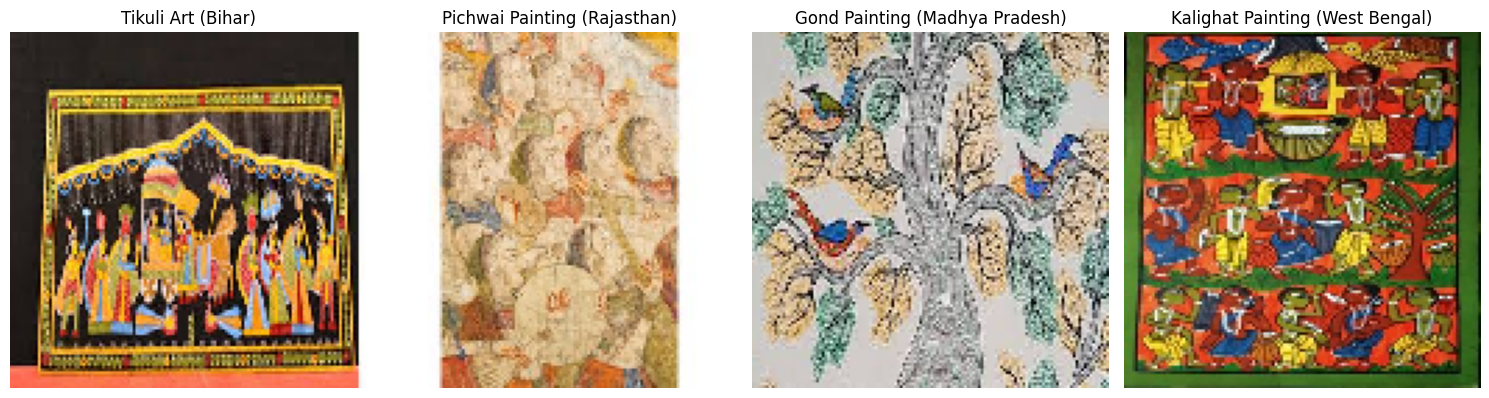

In [12]:


images, labels = next(train_generator)  # Fetches the next batch



num_images = 4

plt.figure(figsize=(15, 10))  # Create a larger figure for better visualization



for index in range(num_images):

    plt.subplot(1, num_images, index + 1)  # Create a subplot for each image

    plt.imshow(images[index])  # Display the image

    class_label = labels[index].argmax()  # Get the class index from one-hot encoding

    class_name = list(train_generator.class_indices.keys())[class_label]  # Get class name

    plt.title(class_name)  # Set the title to the class name

    plt.axis('off')  # Turn off axis



plt.tight_layout()

plt.show()




In [13]:
def build_model():

    # Input layer

    input_layer = Input(shape=(128, 128, 3))



    # Load VGG16 pretrained model without the top layers

    vgg = VGG16(weights='imagenet', include_top=False)(input_layer)



    # Global max pooling layer to reduce spatial dimensions

    f1 = GlobalMaxPooling2D()(vgg)



    regress2 = Dense(128, activation='relu')(f1)

    dropout2 = Dropout(0.5)(regress2)  # Add another dropout layer



    output_layer = Dense(30, activation='softmax')(dropout2)  # Output for 30 classes



    # Define the model

    model = Model(inputs=input_layer, outputs=output_layer)



    return model


In [14]:
model = build_model()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [15]:
# Freeze layers in VGG16 to retain pretrained weights

for layer in model.layers[1].layers:  # Access VGG16 layers

    layer.trainable = False  # Set layers to non-trainable


In [16]:
model.compile(

    optimizer=Adam(learning_rate=0.0001),  # Use a lower learning rate for fine-tuning

    loss='categorical_crossentropy',

    metrics=['accuracy']

)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,784,222 (56.40 MB)

 Trainable params: 69,534 (271.62 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
# Define the log directory

log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))



# Create a TensorBoard callback

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [18]:
history = model.fit(

    train_generator,

    epochs=5,

    validation_data=val_generator,

    callbacks=[tensorboard_callback]

)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733218553.281379     100 service.cc:145] XLA service 0x782340005420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733218553.281428     100 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1733218556.877731     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2644/2644 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0729 - loss: 3.4172

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2644/2644 ━━━━━━━━━━━━━━━━━━━━ 109s 39ms/step - accuracy: 0.0729 - loss: 3.4171 - val_accuracy: 0.2377 - val_loss: 2.8830
Epoch 2/5
2644/2644 ━━━━━━━━━━━━━━━━━━━━ 55s 21ms/step - accuracy: 0.1926 - loss: 2.9068 - val_accuracy: 0.3128 - val_loss: 2.5903
Epoch 3/5
2644/2644 ━━━━━━━━━━━━━━━━━━━━ 55s 21ms/step - accuracy: 0.2590 - loss: 2.6635 - val_accuracy: 0.3617 - val_loss: 2.4148
Epoch 4/5
2644/2644 ━━━━━━━━━━━━━━━━━━━━ 55s 21ms/step - accuracy: 0.3014 - loss: 2.4980 - val_accuracy: 0.3898 - val_loss: 2.2911
Epoch 5/5
2644/2644 ━━━━━━━━━━━━━━━━━━━━ 56s 21ms/step - accuracy: 0.3289 - loss: 2.3887 - val_accuracy: 0.4127 - val_loss: 2.1991


In [19]:
test_loss, test_acc = model.evaluate(test_generator)

print(f"Test Accuracy: {test_acc}")


566/566 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.4219 - loss: 2.1570
Test Accuracy: 0.42061033844947815


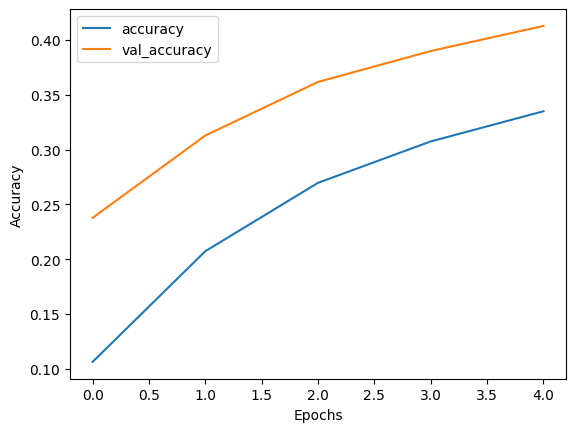

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')

plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

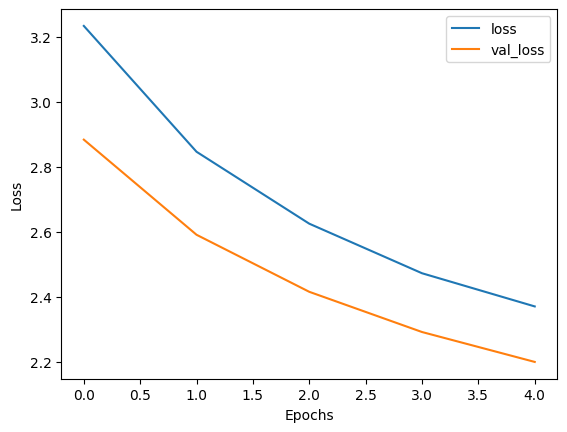

In [21]:
plt.plot(history.history['loss'], label='loss')

plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()